In [ ]:
!python -m spacy download fr_core_news_sm # ce module sert pour la nlp avec le package spacy

# execute cette cellule , puis aller dans l'onglet Runtime > restart runtime
# puis executer la cellule en dessous

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')


In [ ]:
# Chargement des packages et liens de scrapping
import nest_asyncio
nest_asyncio.apply()
import requests 
import pandas as pd
import numpy as np 
from bs4 import BeautifulSoup
response = requests.get("https://www.francetvinfo.fr/sante/maladie/coronavirus/temoignages-covid-19-entre-etat-depressif-et-decrochage-scolaire-ces-jeunes-francais-broient-du-noir_4334125.html")

In [ ]:
# 1----------------------- Scrapping de la page de france info

content = response.content
parser = BeautifulSoup(content, 'html.parser')# Transformation du contenu avec beautifulsoup
print(parser)

In [ ]:
# Récupération de contenu de chaque paragraphe 
classNotInclude = ["ftvi_citation_source", "social-zone__sentence","social__title--hidden"]
f1_p = parser.find_all("p",class_=lambda x: x not in classNotInclude)
print(len(f1_p))
df1 = pd.DataFrame(columns=['numero_P','contenu'])
for i in range(0,len(f1_p)):
  x = f1_p[i]
  a = i
  b = x.text
  df_new_row = pd.DataFrame(data=np.array([[a,b]]), columns=['numero_P','contenu'])
  df1 = pd.concat([df1,df_new_row], ignore_index=True)

df1 = df1[~ df1.contenu.isin(['Navigation média','Navigation par rubrique',"à franceinfo","partager ","articles sur le même thème"
,"vrai ou fake","", ">>", "Si vous "])]



47


In [ ]:
df1.iloc[32,1]

"Si vous avez besoin d'aide, si vous êtes inquiet ou si vous êtes confronté au suicide d'un membre de votre entourage, il existe des services d'écoute anonymes. La ligne Suicide écoute est joignable 24h/24 et 7j/7 au 01 45 39 40 00. D'autres informations sont également disponibles sur le site du ministère des Solidarités et de la Santé."

In [ ]:
import re

def nlp_pipeline(text):

    text = text.lower()
    text = text.replace('\n', ' ').replace('\r', '')
    text = ' '.join(text.split())
    text = re.sub(r"[A-Za-z\.]*[0-9]+[A-Za-z%°\.]*", "", text)
    text = re.sub(r"(\s\-\s|-$)", "", text)
    text = re.sub(r"[,\!\?\%\(\)\/\"]", "", text)
    text = re.sub(r"\&\S*\s", "", text)
    text = re.sub(r"\&", "", text)
    text = re.sub(r"\+", "", text)
    text = re.sub(r"\#", "", text)
    text = re.sub(r"\$", "", text)
    text = re.sub(r"\£", "", text)
    text = re.sub(r"\%", "", text)
    text = re.sub(r"\:", "", text)
    text = re.sub(r"\@", "", text)
    text = re.sub(r"\-", "", text)
    text = re.sub(r">> ", "", text)
    text = re.sub(r"\*", "", text)
    

    return text

In [ ]:
# Nettoyage
import pandas as pd
df1_corpus_clean = df1.contenu.apply(nlp_pipeline)
df1_corpus_clean = df1_corpus_clean[~df1_corpus_clean.isin(['navigation média','navigation par rubrique',"à franceinfo","partager ","articles sur le même thème"
,"vrai ou fake","\s", ">>", "si vous", "les prénoms "])].reset_index().contenu[:31]
df1_corpus_clean[1]


"je ne voyais plus l'intérêt d'être en vie si c'était pour être confinée. au téléphone constance laisse s'installer un silence. en novembre dernier la caennaise de  ans a demandé de l'aide à ses parents pour entamer un suivi psychologique après avoir été en proie à des idées très noires. je suis en recherche d'emploi dans le tourisme mais il n'y a absolument aucune annonce racontetelle à franceinfo. je ne voyais aucune raison de me lever le matin je n'avais aucun espoir que la situation sanitaire s'améliore."

In [ ]:
import nltk
nltk.download('stopwords')
# a telecharger une seule fois

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import spacy
nlp = spacy.load('fr_core_news_sm')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('french'))

In [ ]:
def return_token(sentence): # tokenisation par mot
    return [X.text for X in nlp(sentence)]

def return_token_sent(sentence): # tokenisation par phrase
    return [X.text for X in nlp(sentence).sents]

def clean_stop_word(token):
    return [t for t in token if t not in stop_words]
  
def return_NER(sentence): #entite_nommee
    if type(sentence) is list or type(sentence) == "pandas.core.series.Series" :
        res = []
        for s in sentence:
            res.extend([(X.text, X.label_) for X in nlp(s).ents])
        return res
    else:
        return [(X.text, X.label_) for X in nlp(sentence).ents]




def return_POS(sentence): #morpho_synthax
    if type(sentence) is list or type(sentence) == "pandas.core.series.Series" :
        res = []
        for s in sentence:
            res.extend([(X, X.pos_) for X in nlp(s)])
        return res
    else:
        return [(X, X.pos_) for X in nlp(sentence)]


In [ ]:
# df1_corpus_clean.to_csv('/content/drive/MyDrive/quentin_daniel/france_info.csv')

# Freq dist





In [ ]:
# tokenisation
token_df1 = df1_corpus_clean.apply(return_token)
token_df1 = token_df1.apply(clean_stop_word) # clean_stop_word sert a enlever tous les "à", "et",... de maniere a ne garder que les mots qui apportent une information
token_df1.apply(return_POS)

0     [(trois, NUM), (quarts, ADJ), (jeunes, ADJ), (...
1     [(voyais, ADJ), (plus, ADV), (l, NOUN), (', PU...
2     [(covid, NOUN), ( , SPACE), (suivez, NOUN), (d...
3     [(comme, ADP), ( , SPACE), (desans, ADJ), (sen...
4     [(c, NOUN), (', PUNCT), (cas, NOUN), (paul, PR...
5     [(laure, NOUN), ( , SPACE), (ans, NOUN), (deux...
6     [(jeune, ADJ), (femme, NOUN), (manifeste, ADJ)...
7     [(n, NOUN), (', PUNCT), (a, NOUN), (pris, VERB...
8     [(chez, ADP), (d, NOUN), (', PUNCT), (autres, ...
9     [(amis, NOUN), (prévenu, VERB), (parents, NOUN...
10    [(grâce, NOUN), (antidépresseurs, ADJ), (presc...
11    [(maxime, NOUN), (souffrait, VERB), (dépressio...
12    [(états, NOUN), (anxieux, ADJ), (s, NOUN), (',...
13    [(j, NOUN), (', PUNCT), (assistais, ADJ), (cou...
14    [(jeune, ADJ), (femme, NOUN), ( , SPACE), (ans...
15    [(paul, PROPN), (a, NOUN), (planté, NOUN), (pr...
16    [(étudiants, NOUN), (réclament, NOUN), (repris...
17    [(cette, DET), (situation, NOUN), (affecte

In [ ]:
# freqDist
import nltk.corpus
from nltk.text import Text
import numpy as np
from nltk import FreqDist
FI2 = Text(token_df1)
franceinfo_graph = []
b = [".", " ", "a", "d'","j'","n'","l'","m'","s'","c'"] # j'enleve les mots qui ne nous interesse pas
for i in FI2:
  for a in i:
    if np.logical_not(a in b):
      franceinfo_graph.append(a)

fd = FreqDist(franceinfo_graph)
print(fd)

<FreqDist with 642 samples and 1041 outcomes>


In [ ]:
fd # on remarque que des termes sont inutiles comme '.'     "'"     "["     ...

FreqDist({"'": 2,
          '[': 1,
          ']': 2,
          'absolument': 2,
          'accompagnent': 1,
          'achever': 1,
          'activité': 1,
          'actualités': 1,
          'admise': 1,
          'affecte': 1,
          'afp': 3,
          'agathe': 1,
          'agissait': 1,
          'aide': 2,
          'aides': 1,
          'aidesoignante': 2,
          'ajoute': 1,
          'alain': 1,
          'alcool': 1,
          'alimentaire': 3,
          'allant': 1,
          'alors': 5,
          'amis': 4,
          'améliore': 1,
          'angoissaient': 1,
          'angoisse': 1,
          'angoisses': 1,
          'annonce': 1,
          'année': 6,
          'anorexie': 1,
          'ans': 11,
          'antidépresseurs': 3,
          'anxieux': 1,
          'anxiété': 4,
          'août': 1,
          'appartenant': 1,
          'apprentissage': 1,
          'après': 3,
          'arrivais': 2,
          'arrivant': 1,
          'arrive': 2,
          'ar

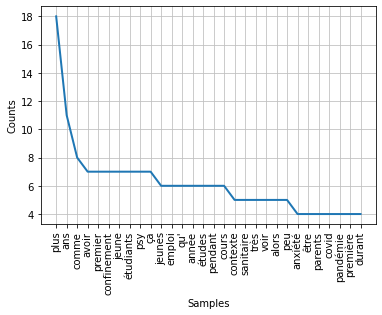

In [ ]:
fd.plot(30) # le numero 30 correspond au nb d'elements qu'on veut voir affciher sur l'axe des abscisses
# on distingue bien les mots : étudiants/ confinement/ anxiété/ isolement/ covid (bon pour isolement il apparait que 2 fois mais il est en rapport avec notre thématique)